# **Electrical modeling**

Goals for today:
1. Repeat the basic fundamentals of electrical circuits
2. Study the properties of hardware filters and the basics of their design and modeling
3. Consider application problems for RL, RC and RLC filters

## **Basic elements of an electrical circuit**

### **Resistance**
The electrical resistance of an object is a measure of its opposition to the flow of electric current. Its reciprocal quantity is electrical conductance, measuring the ease with which an electric current passes. Electrical resistance shares some conceptual parallels with mechanical friction.
$$
V = RI
$$

**Resistor connection in series**

![rp](https://drive.google.com/uc?export=view&id=1cPgEPft4mjQCndvCFX8S4NysevA7ORqa)

$$
R_{series} = \sum^n_{k=1}{R_k}
$$

**Resistor connection in parallel**

![rp](https://drive.google.com/uc?export=view&id=1iUdpoR3euyCOpTTdsijcTWc4aQ6sM1dd)

$$
R_{parallel} = \frac{1}{\sum^n_{k=1}{\frac{1}{R_k}}}
$$

### **Inductance**
Inductance is the tendency of an electrical conductor to oppose a change in the electric current flowing through it. The electric current produces a magnetic field around the conductor. The magnetic field strength depends on the magnitude of the electric current, and follows any changes in the magnitude of the current.

$$
V = L\frac{dI}{dt}
$$

**Inductance connection in series**

![rp](https://drive.google.com/uc?export=view&id=1I5LLoi4rP65Tc7-EUhYTKimiPsY4XpE8)

$$
L_{series} = \sum^n_{k=1}{L_k}
$$


**Inductance connection in parallel**

![rp](https://drive.google.com/uc?export=view&id=12A6roBN6Ta4N9s6SKJGeNQAa0hbsW5GY)

$$
L_{parallel} = \frac{1}{\sum^n_{k=1}{\frac{1}{L_k}}}
$$


### **Capacitor**

A capacitor is a device that stores electrical energy in an electric field by accumulating electric charges on two closely spaced surfaces that are insulated from each other. It is a passive electronic component with two terminals.
$$
I = C\frac{dV}{dt}
$$

**Capacitor connection in series**

![rp](https://drive.google.com/uc?export=view&id=1z3NCOTjfm1cWTfpFJzko_uHX6FP-b0ck)
$$
C_{series} = \frac{1}{\sum^n_{k=1}{\frac{1}{C_k}}}
$$


**Capacitor connection in parallel**

![rp](https://drive.google.com/uc?export=view&id=1vdHaNzXQkj7qOBBZzGN4wBj2Bmb7P5O0)
$$
C_{parallel} = \sum^n_{k=1}{C_k}
$$



## **Kirchhoff's circuit laws**


### **Kirchhoff's current law**
The algebraic sum of currents in a network of conductors meeting at a point is zero.

![kcl](https://upload.wikimedia.org/wikipedia/commons/4/46/KCL_-_Kirchhoff%27s_circuit_laws.svg)

$$
\sum^n_{k=1}{I_k} = 0
$$

Kirchhoff's circuit laws were originally obtained from experimental results. However, the current law can be viewed as an extension of the conservation of charge, since charge is the product of current and the time the current has been flowing. If the net charge in a region is constant, the current law will hold on the boundaries of the region. This means that the current law relies on the fact that the net charge in the wires and components is constant.

In this example the formula will be follow:
$$
- i_1 + i_2 + i_3 + i_4 = 0
$$

### **Kirchhoff's voltage law**
The directed sum of the potential differences (voltages) around any closed loop is zero.
![kvl](https://upload.wikimedia.org/wikipedia/commons/7/77/Kirshhoff-example.svg)
$$
\sum^n_{k=1}{V_k} = 0
$$
The sum of voltages for DC:
$$
\sum^n_{k=1}{V_k} = \sum^m_{k=1}{R_kI_k}
$$
The sum of voltages for AC:
$$
\sum^n_{k=1}{V_k} = \sum^m_{k=1}{R_kI_k}+\sum^m_{k=1}{V_{L_k}}+\sum^m_{k=1}{V_{C_k}}
$$


## **Concept of Impedance**

**Impedance** is the opposition to alternating current presented by the combined effect of resistance and reactance in a circuit.

> **NOTE** If a circuit consists of a potential
source and a resistor, the impedance and the resistance are the same thing.

The input–output relationship between voltage and current in a resistor circuit is:
$$
\frac{V(t)}{I(t)} = R
$$

If we will take this equation in the Fourier form it will be the same:
$$
Z = \frac{V(jw)}{I(jw)} = R
$$

where Z is impedance, $w$ is frequency and $j = \sqrt{-1}$.

The impedance of a resistor is a real constant R.

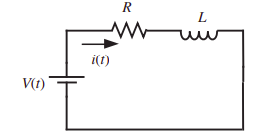

$$
V(t) = RI(t) + L\frac{dI(t)}{dt}
$$

and in the Fourier form this equation goes to be:
$$
Z = \frac{V(jw)}{I(jw)} = R + jwL
$$

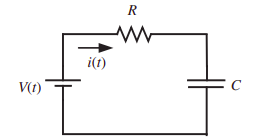

$$
V(t) = RI(t) + \frac{1}{C}\int_0^tI(\tau)d\tau
$$

The impedance in this case is:
$$
Z = \frac{V(jw)}{I(jw)}=R+\frac{1}{jwC} = \frac{jwRC+1}{jwC}
$$

## **Hardware filters**

In [ ]:
from scipy.signal import StateSpace, TransferFunction, ss2tf, lsim
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def get_dynamics_ss(A, B, C, D, V_in, t):
  sys = StateSpace(A, B, C, D)
  return lsim(sys, V_in, t)

def plot_voltage(t, V_in, t_out=None, V_out=None, title=''):
  plt.plot(t, V_in, label=r'${V_{in}}$')
  if V_out is not None:
    if t_out is not None:
      plt.plot(t_out, V_out, 'r', label=r'${V_{out}}$')
    else:
      plt.plot(t, V_out, 'r', label=r'${V_{out}}$')
  plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
  plt.grid(True)
  plt.xlabel(r'Time ${t}$')
  plt.ylabel(r'Voltage ${V}$')
  plt.title(title)
  plt.legend()
  plt.ylim([np.min(V_in), np.max(V_in)])
  plt.show()

def plot_bode(A, B, C, D, sys=None):
  if sys is None:
    G = ss2tf(A, B, C, D)
    sys = TransferFunction(G[0], G[1])

  w, mag, phase = sys.bode()

  f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
  ax1.semilogx(w, mag, 'r')
  ax1.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
  ax1.grid(True)
  ax1.set_ylabel(r'Magnitude $A$')

  ax2.semilogx(w, phase, 'r')
  ax2.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
  ax2.grid(True)
  ax2.set_ylabel(r'Phase $\phi$')

  plt.xlabel(r'Frequency $w$')
  plt.show()

We will use the following input voltage signal to test the performance of the filters.

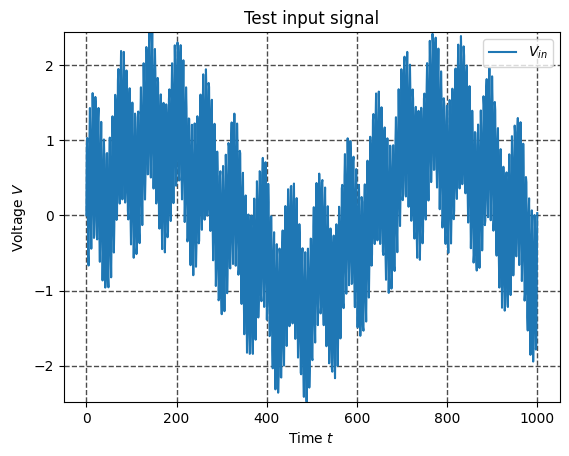

In [ ]:
#@markdown Input signal parameters
w_1 = 1 #@param {type:"slider", min:0, max:1, step:0.01}
w_2 = 0.1 #@param {type:"slider", min:0, max:1, step:0.01}
w_3 = 0.01 #@param {type:"slider", min:0, max:1, step:0.01}
A_1 = 1 #@param {type:"slider", min:0, max:1, step:0.01}
A_2 = 0.5 #@param {type:"slider", min:0, max:1, step:0.01}
A_3 = 1 #@param {type:"slider", min:0, max:1, step:0.01}

#@markdown Simulation parameters
t_0 = 0
t_f = 1000 #@param {type:"slider", min:1, max:1000, step:1}
t = np.linspace(t_0, t_f, 1000)

V_in = A_1*np.sin(w_1*t) + A_2*np.sin(w_2*t) + A_3*np.sin(w_3*t)

plot_voltage(t, V_in, title='Test input signal')

### **RC filter**

The first type of RC filter is an condensator connected in series with the voltage input and a resistor in parallel

![kvl](https://www.ruselectronic.com/wp-content/uploads/2018/06/high-frequency.jpg?is-pending-load=1)

This type is described by the following electrodynamic equation:

$$
C\frac{dV_C}{dt} = \frac{V_{in} - V_C}{R}
$$
where $V_{in}$ is voltage between terminals **X1** and **X2**

The output voltage for this case is voltage on resistor:
$$
V_{out} = V_R =V_{in} - V_C
$$


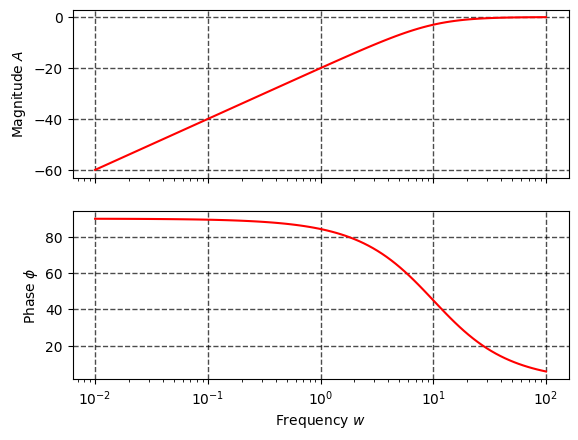

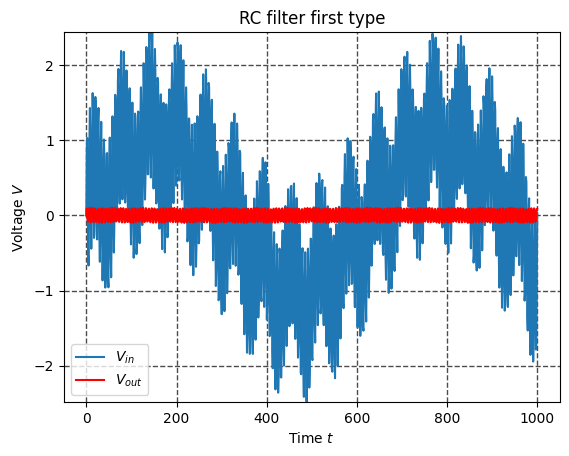

In [ ]:
R = 0.1 #@param {type:"slider", min:0, max:5, step:0.1}
Cond = 1 #@param {type:"slider", min:0, max:5, step:0.1}

A = -1/(R*Cond)
B = 1/(R*Cond)
C = -1
D = 1

plot_bode(A, B, C, D)

t_out, V_out, x_out = get_dynamics_ss(A, B, C, D, V_in, t)
plot_voltage(t, V_in, V_out=V_out, title='RC filter first type')

The second type of RC filter is an condensator connected in parallel with the voltage input and a resistor in series

![kvl](https://www.ruselectronic.com/wp-content/uploads/2018/06/RC_filt.jpg)

This type is described by the following electrodynamic equation:

$$
C\frac{dV_C}{dt} = \frac{V_{in} - V_C}{R}
$$
where $V_{in}$ is voltage between terminals **X1** and **X2**

The output voltage for this case is voltage on resistor:
$$
V_{out} = V_C
$$


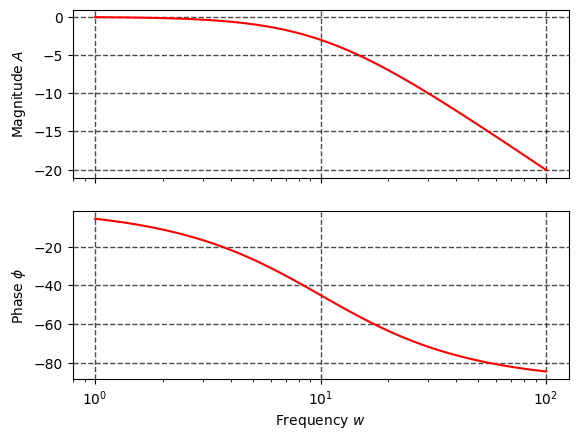

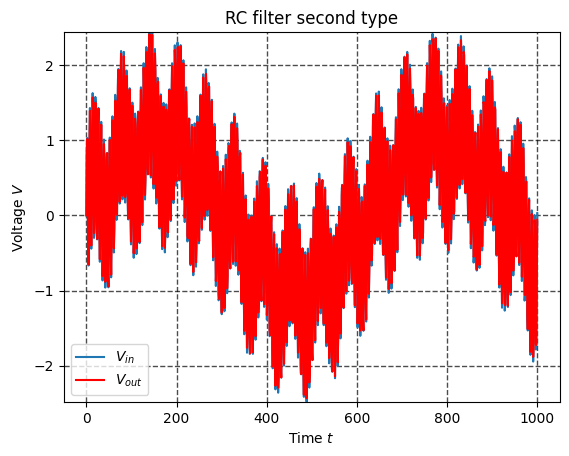

In [ ]:
R = 0.1 #@param {type:"slider", min:0, max:5, step:0.1}
Cond = 1 #@param {type:"slider", min:0, max:5, step:0.1}

A = -1/(R*Cond)
B = 1/(R*Cond)
C = 1
D = 0

plot_bode(A, B, C, D)

t_out, V_out, x_out = get_dynamics_ss(A, B, C, D, V_in, t)
plot_voltage(t, V_in, V_out=V_out, title='RC filter second type')

### **RL filter**

The first type of RL filter is an inductance coil connected in series with the voltage input and a resistor in parallel

![kvl](https://www.ruselectronic.com/wp-content/uploads/2018/06/coil_filter.jpg?is-pending-load=1)

This type is described by the following electrodynamic equation:

$$
L \frac{dI}{dt} + RI = V_{in}
$$
where $V_{in}$ is voltage between terminals **X1** and **X2**

The output voltage for this case is voltage on resistor:
$$
V_{out} = V_R =V_{in} - V_L
$$


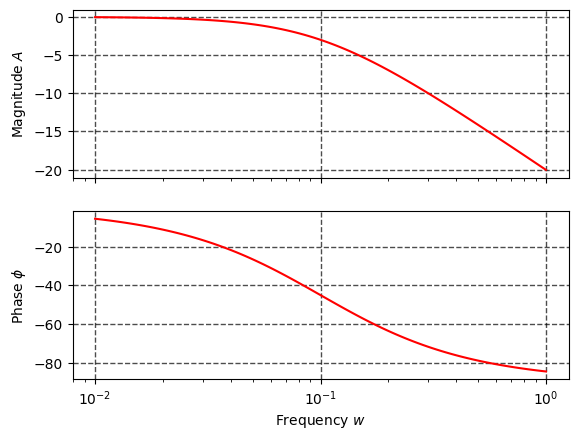

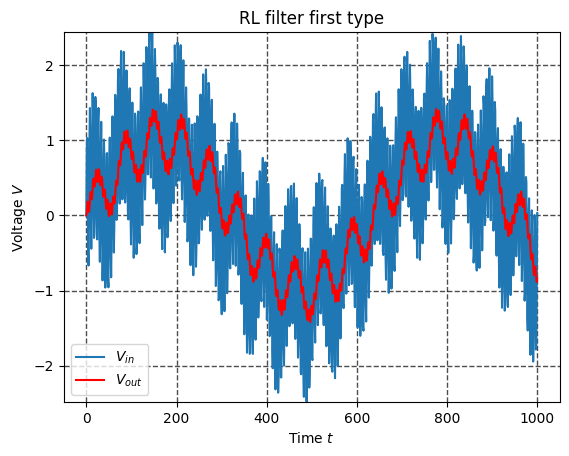

In [ ]:
R = 0.1 #@param {type:"slider", min:0, max:5, step:0.1}
L = 1 #@param {type:"slider", min:0, max:5, step:0.1}

A = -R/L
B = 1/L
C = R
D = 0

plot_bode(A, B, C, D)

t_out, V_out, x_out = get_dynamics_ss(A, B, C, D, V_in, t)
plot_voltage(t, V_in, V_out=V_out, title='RL filter first type')

The second type of RL filter is an inductance coil connected in parallel with the voltage input and a resistor in series

![kvl](https://www.ruselectronic.com/wp-content/uploads/2018/06/coil_filt.jpg?is-pending-load=1)

This type is described by the following electrodynamic equation:

$$
L \frac{dI}{dt} + RI = V_{in}
$$
where $V_{in}$ is voltage between terminals **X1** and **X2**

The output voltage for this case is voltage on inductor:
$$
V_{out} = V_L =V_{in} - V_R
$$


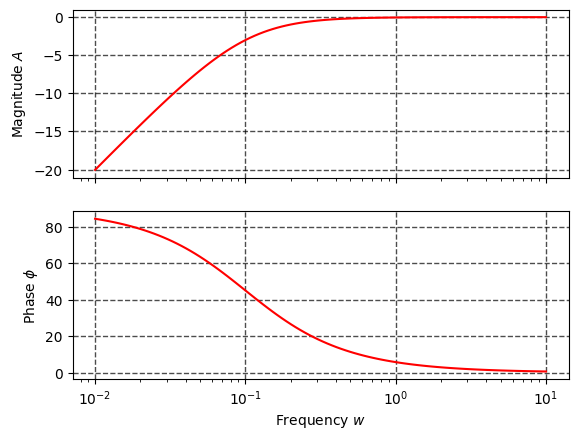

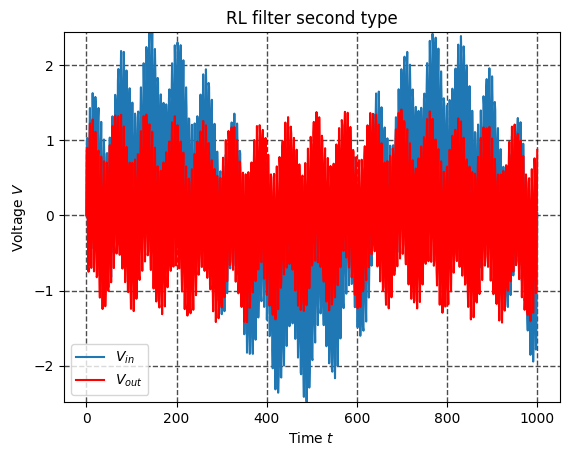

In [ ]:
R = 0.1 #@param {type:"slider", min:0, max:5, step:0.1}
L = 1 #@param {type:"slider", min:0, max:5, step:0.1}

A = -R/L
B = 1/L
C = -R
D = 1

plot_bode(A, B, C, D)

t_out, V_out, x_out = get_dynamics_ss(A, B, C, D, V_in, t)
plot_voltage(t, V_in, V_out=V_out, title='RL filter second type')

### **RLC filter**


In this circuit, the three components are all in series with the voltage source. The governing differential equation can be found by substituting into Kirchhoff's voltage law the constitutive equation for each of the three elements.

![kvl](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/RLC_series_circuit_v1.svg/250px-RLC_series_circuit_v1.svg.png)

$$
L\frac{dI}{dt}+\frac{q}{C}+RI=V_{in}
$$
where $V_C=\frac{q}{C}$ and $V_L = L\frac{dI}{dt}$
The transfer function for this dynamic model is:
$$
I_s=\frac{sC}{s^2LC+sRC+1}V_s
$$

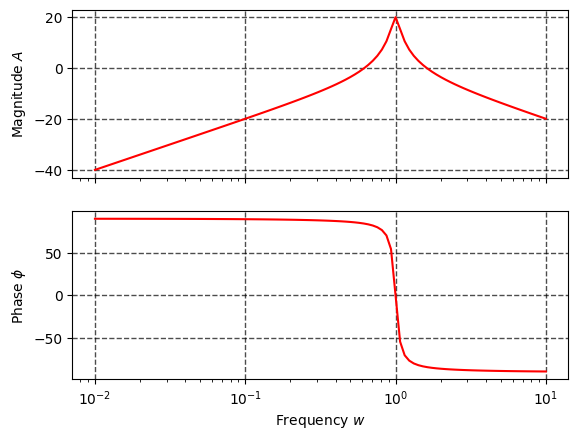

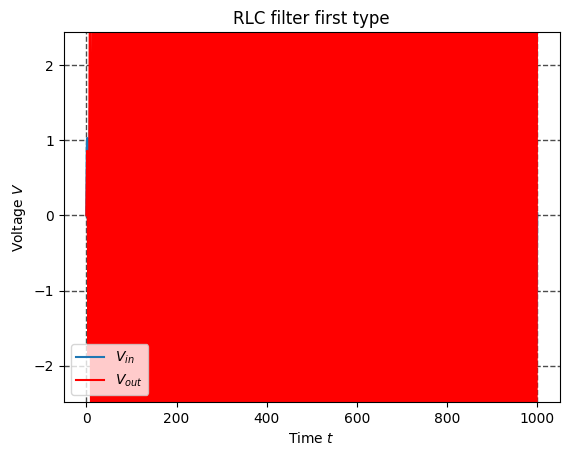

In [ ]:
R = 0.1 #@param {type:"slider", min:0, max:5, step:0.1}
L = 1 #@param {type:"slider", min:0, max:5, step:0.1}
Cond = 1 #@param {type:"slider", min:0, max:5, step:0.1}

num = [0, Cond, 0]
den = [L*Cond, R*Cond, 1]
sys = TransferFunction(num, den)
plot_bode(None, None, None, None, sys)
t_out, V_out, x_out = lsim(sys, V_in, t)
plot_voltage(t, V_in, V_out=V_out, title='RLC filter first type')

## **Application of electric filters**

A strain gauge is a weight-measuring element that reacts to a change in the magnitude of a physical force (force) and translates it into an electrical signal. In fact, it is a resistor that changes the ohmic resistance parameter in relation to the applied force. In practice, they are widely used to measure mass and load in weighing systems. Depending on the field of application, different types of load cells are used, differing both in the principle of operation and design features.
![kvl](https://ae01.alicdn.com/kf/Hd768001aa1bc4783bb57fbe134ebf5f9C.png)

Standard force sensor wiring harness layout:

![kvl](https://drive.google.com/uc?export=view&id=1IgSxDvyyMrhA13ATQtM8rDzUlkvD_wE8)

To connect the force sensor to the microcontroller, either an ADC is used or it is connected to the input to an analog signal through an amplifier. Amplifiers are more versatile, however they are very noisy.

> **Tasks**
>
> The laborants performed noise studies on the force sensor. A chirp signal was applied to the sensor using a third-party device. Data from the sensor is available at the link: https://drive.google.com/file/d/1r0Qcqx3ZOoBt1VI3WWQ41NG9VXzaBSGn/view?usp=sharing

>1. Design a filter for this sensor so that it operates in the frequency range of 1 to 50 Hz. When designing, use the ratings of standard elements that can be purchased: https://www.chipdip.ru/.
>2. Write the electrodynamics equation for your filter and simulate its behavior. Get a plot of the amplitude-frequency response and simulation in time with V_in and V_out
>3. Design a board for the output from the amplifier, to the analog input of the microcontroller. Use the development environment https://easyeda.com/ to develop the board.  Get the 3d model and circuit scheme for your board.

# Solution

We can use a capacitor and resistor to create a low-pass filter.


$$
C\frac{dV_C}{dt} = \frac{V_{in} - V_C}{R}
$$
where $V_{in}$ is voltage between terminals **X1** and **X2**

The output voltage for this case is voltage on capacitor:
$$
V_{out} = V_C
$$

Using this formula for frequency, we can find appropriate values for resistance $R$ and capacitance $C$.

$$ f = \dfrac{1}{2 \pi RC} $$


Let's choose the following values:

$R = 1.5 \text{kΩ}$, $C = 2.2 \cdot 10^{-6} \text{F}$

The max frequency will be: $48.23 \text{Hz}$.



In [20]:
import numpy as np

def frequency(R, C):
  f = 1 / (2 * np.pi * R * C)
  return f

## Scheme of the RC low-pass filter
![scheme_2d](https://drive.google.com/uc?export=view&id=1FzNqeaHV2XhGzx2wUvG5194P0RabnBCU)

In [4]:
from scipy.signal import StateSpace, TransferFunction, ss2tf, lsim
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def get_dynamics_ss(A, B, C, D, V_in, t):
  sys = StateSpace(A, B, C, D)
  return lsim(sys, V_in, t)

def plot_voltage(t, V_in, t_out=None, V_out=None, title=''):
  plt.plot(t, V_in, label=r'${V_{in}}$')
  if V_out is not None:
    if t_out is not None:
      plt.plot(t_out, V_out, 'r', label=r'${V_{out}}$')
    else:
      plt.plot(t, V_out, 'r', label=r'${V_{out}}$')
  plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
  plt.grid(True)
  plt.xlabel(r'Time ${t}$')
  plt.ylabel(r'Voltage ${V}$')
  plt.title(title)
  plt.legend()
  plt.ylim([np.min(V_in), np.max(V_in)])
  plt.show()

def plot_bode(A, B, C, D, sys=None):
  if sys is None:
    G = ss2tf(A, B, C, D)
    sys = TransferFunction(G[0], G[1])

  w, mag, phase = sys.bode()

  f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
  ax1.semilogx(w, mag, 'r')
  ax1.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
  ax1.grid(True)
  ax1.set_ylabel(r'Magnitude $A$')

  ax2.semilogx(w, phase, 'r')
  ax2.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
  ax2.grid(True)
  ax2.set_ylabel(r'Phase $\phi$')

  plt.xlabel(r'Frequency $w$')
  plt.show()

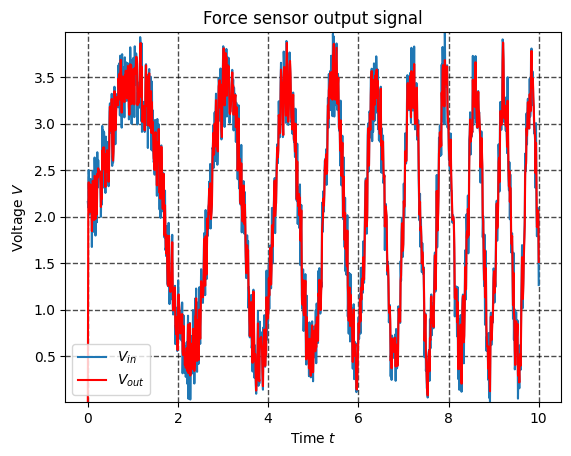

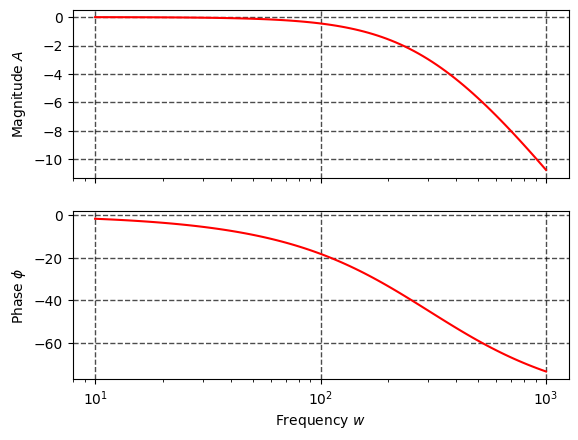

In [10]:
import pandas as pd

data = pd.read_csv('Force_sensor_data.csv')
V_in = data['Voltage [V]']
t = data['Time [sec]']
t_0 = t[0]
t = t - t_0

R = 1.5*10**3
C = 2.2*10**(-6)

A = - 1 / (R * C)
B = 1 / (R * C)
C = 1
D = 0

t_out, V_out, x_out = get_dynamics_ss(A, B, C, D, V_in, t)
plot_voltage(t, V_in, t_out=t_out, V_out=V_out, title='Force sensor output signal')
plot_bode(A, B, C, D)

## Observations

If we increase the amplitude of either R or C, the output signal becomes less noisy.

2400.0 4.7e-06
frequency:  14.109480770558099  Hz


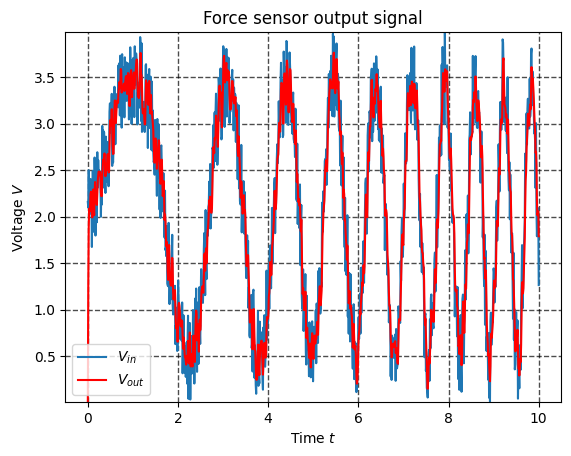

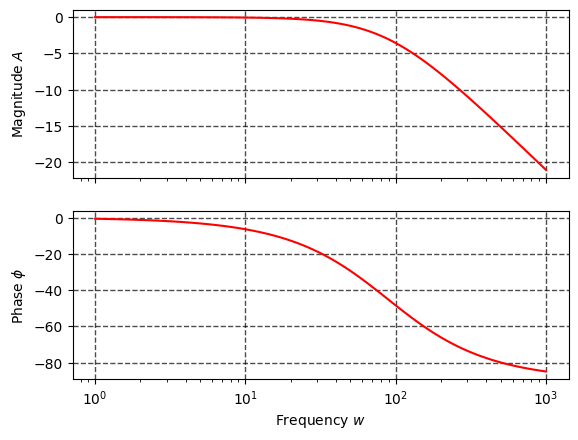

In [21]:
import pandas as pd

data = pd.read_csv('Force_sensor_data.csv')
V_in = data['Voltage [V]']
t = data['Time [sec]']
t_0 = t[0]
t = t - t_0

R_kilo = 2.4 #@param {type:"slider", min: 1, max: 3, step: 0.1}
C_mikro = 4.7 #@param {type:"slider", min: 1, max: 5, step: 0.1}

R = R_kilo * 1000
C = C_mikro * 10**(-6)
print(R, C)
f = frequency(R, C)

print("frequency: ", f, " Hz")

A = - 1 / (R * C)
B = 1 / (R * C)
C = 1
D = 0

t_out, V_out, x_out = get_dynamics_ss(A, B, C, D, V_in, t)
plot_voltage(t, V_in, t_out=t_out, V_out=V_out, title='Force sensor output signal')
plot_bode(A, B, C, D)

# Deliverables

Here, you can find a photo, scheme and model of the board for the output from the amplifier:

https://github.com/illusoryTwin/Mechatronics